In [1]:
# Import All required Modules

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import statsmodels.api as sm
import scipy.stats as stats
import copy
import os

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# Load Data 

df = pd.read_csv('Mcdonald .csv')

In [3]:
df.head()

Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0                             25        0.0  ...             31   
1                             15        0.0  ...             30   
2                             42        0.0  ...             29   
3                             52        0.0  ...             30   
4                             42        0.0  ...             30   

   Carbohydrates (% Daily Value)  Dietary Fiber  \
0                             10              4   
1                             10              4   
2                             10              4   
3                             10              4   
4                             10              4   

   Dietary Fiber (% Daily Value)  Sugars  Protein  Vitamin A (% Daily Value)  \
0                             17       3       17                         10   
1                             17       3       18                          6   
2                             17       2       14                          8   
3                             17       2       21                         15   
4                             17       2       21                          6   

   Vitamin C (% Daily Value)  Calcium (% Daily Value)  Iron (% Daily Value)  
0                          0                       25                    15  
1                          0                       25                     8  
2                          0                       25                    10  
3                          0                       30                    15  
4                          0                       25                    10  

[5 rows x 24 columns]

In [4]:
df.shape

(260, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [6]:
df.isnull().values.any()

False

- Data has 260 rows & 24 Columns
- 18 int columns,3 float columns, 3 String/Object columns
- No Null Values

In [7]:
df.describe(include='all').T

count unique                top freq  \
Category                         260      9       Coffee & Tea   95   
Item                             260    260  Sweet Tea (Child)    1   
Serving Size                     260    107       16 fl oz cup   45   
Calories                       260.0    NaN                NaN  NaN   
Calories from Fat              260.0    NaN                NaN  NaN   
Total Fat                      260.0    NaN                NaN  NaN   
Total Fat (% Daily Value)      260.0    NaN                NaN  NaN   
Saturated Fat                  260.0    NaN                NaN  NaN   
Saturated Fat (% Daily Value)  260.0    NaN                NaN  NaN   
Trans Fat                      260.0    NaN                NaN  NaN   
Cholesterol                    260.0    NaN                NaN  NaN   
Cholesterol (% Daily Value)    260.0    NaN                NaN  NaN   
Sodium                         260.0    NaN                NaN  NaN   
Sodium (% Daily Value)         260.0    NaN                NaN  NaN   
Carbohydrates                  260.0    NaN                NaN  NaN   
Carbohydrates (% Daily Value)  260.0    NaN                NaN  NaN   
Dietary Fiber                  260.0    NaN                NaN  NaN   
Dietary Fiber (% Daily Value)  260.0    NaN                NaN  NaN   
Sugars                         260.0    NaN                NaN  NaN   
Protein                        260.0    NaN                NaN  NaN   
Vitamin A (% Daily Value)      260.0    NaN                NaN  NaN   
Vitamin C (% Daily Value)      260.0    NaN                NaN  NaN   
Calcium (% Daily Value)        260.0    NaN                NaN  NaN   
Iron (% Daily Value)           260.0    NaN                NaN  NaN   

                                     mean         std  min    25%    50%  \
Category                              NaN         NaN  NaN    NaN    NaN   
Item                                  NaN         NaN  NaN    NaN    NaN   
Serving Size                          NaN         NaN  NaN    NaN    NaN   
Calories                       368.269231  240.269886  0.0  210.0  340.0   
Calories from Fat              127.096154  127.875914  0.0   20.0  100.0   
Total Fat                       14.165385   14.205998  0.0  2.375   11.0   
Total Fat (% Daily Value)       21.815385   21.885199  0.0   3.75   17.0   
Saturated Fat                    6.007692    5.321873  0.0    1.0    5.0   
Saturated Fat (% Daily Value)   29.965385   26.639209  0.0   4.75   24.0   
Trans Fat                        0.203846    0.429133  0.0    0.0    0.0   
Cholesterol                     54.942308   87.269257  0.0    5.0   35.0   
Cholesterol (% Daily Value)     18.392308   29.091653  0.0    2.0   11.0   
Sodium                             495.75  577.026323  0.0  107.5  190.0   
Sodium (% Daily Value)          20.676923   24.034954  0.0   4.75    8.0   
Carbohydrates                   47.346154   28.252232  0.0   30.0   44.0   
Carbohydrates (% Daily Value)   15.780769    9.419544  0.0   10.0   15.0   
Dietary Fiber                    1.630769    1.567717  0.0    0.0    1.0   
Dietary Fiber (% Daily Value)    6.530769    6.307057  0.0    0.0    5.0   
Sugars                          29.423077   28.679797  0.0   5.75   17.5   
Protein                         13.338462   11.426146  0.0    4.0   12.0   
Vitamin A (% Daily Value)       13.426923   24.366381  0.0    2.0    8.0   
Vitamin C (% Daily Value)        8.534615   26.345542  0.0    0.0    0.0   
Calcium (% Daily Value)         20.973077   17.019953  0.0    6.0   20.0   
Iron (% Daily Value)             7.734615    8.723263  0.0    0.0    4.0   

                                 75%     max  
Category                         NaN     NaN  
Item                             NaN     NaN  
Serving Size                     NaN     NaN  
Calories                       500.0  1880.0  
Calories from Fat              200.0  1060.0  
Total Fat                      22.25   118.0  
Total Fat (% Daily Value)

- there are total 260 items related info in data set.
- 'Coffee & Tea' is the most frequent Catagory with the Frequency of 95
- '16 fl oz cup' is the most frequent Serving Size with the Frequency of 45

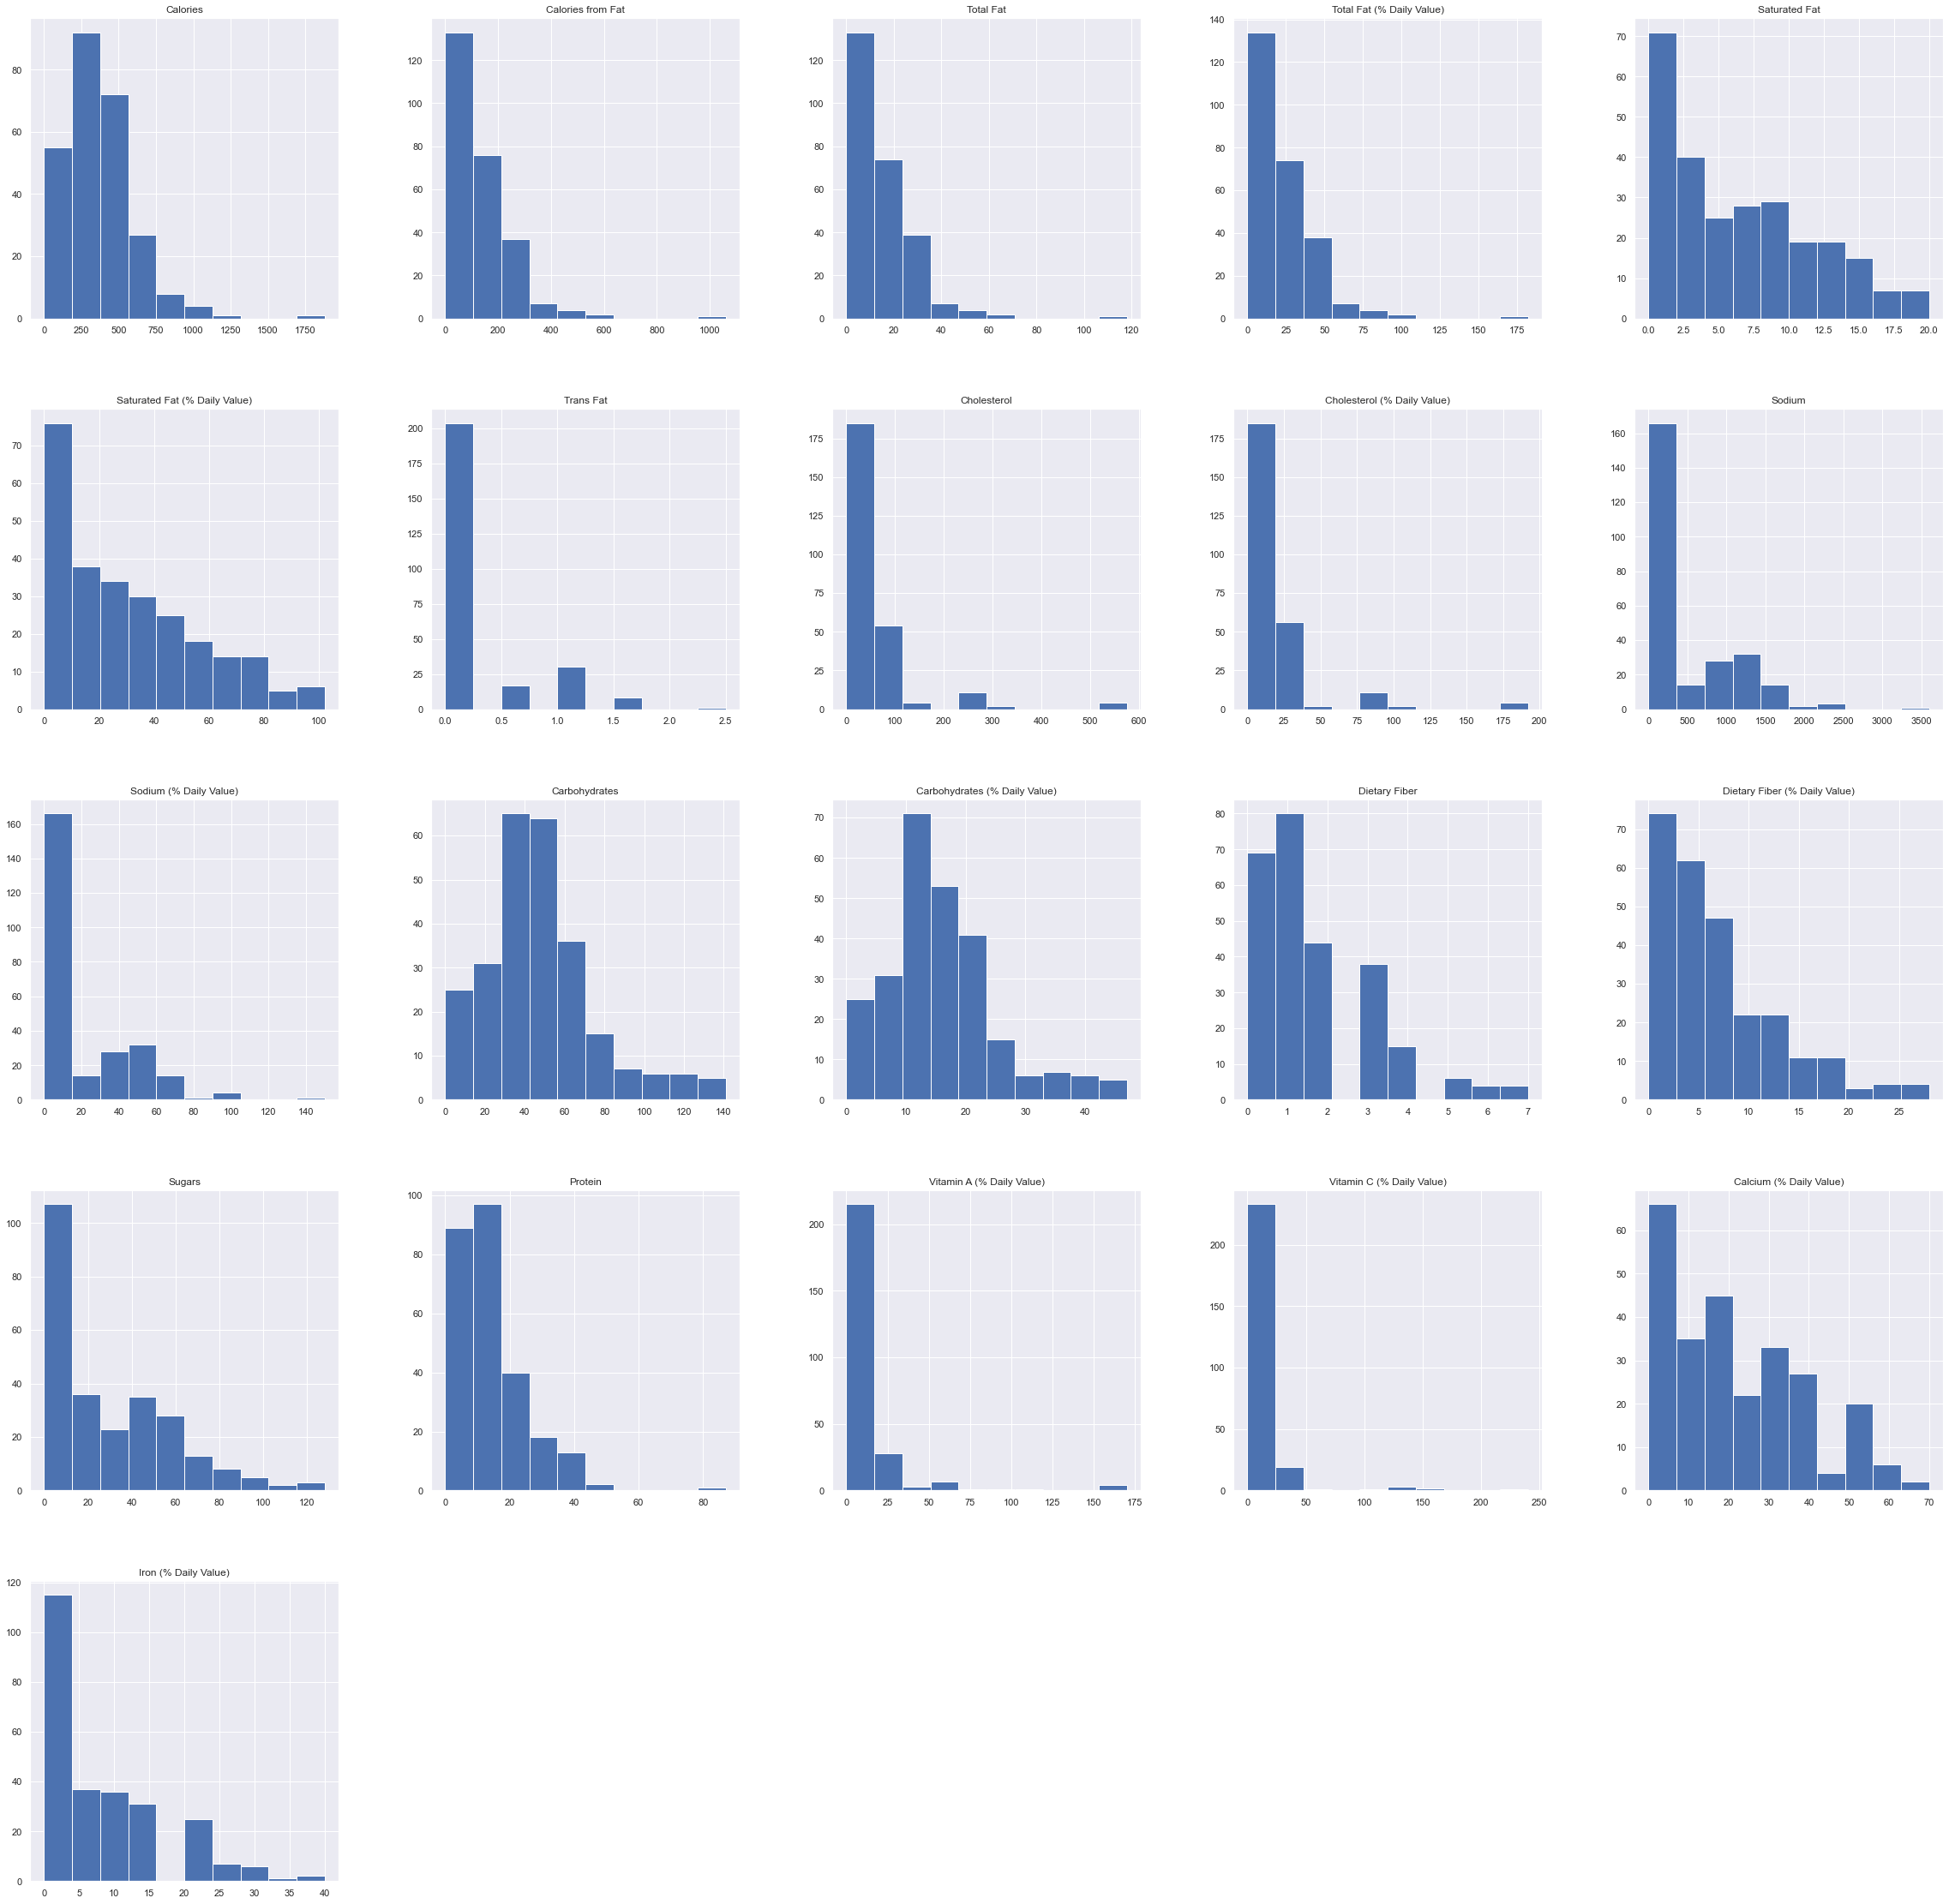

In [8]:
df.hist(figsize=(40,40));

In [9]:
# Finding number of Items in each Category
# Converting resultant series into DF
# Renaming the column as 'Item_Count' from 'Item'

s = df.groupby('Category').Item.nunique().sort_values(ascending = False).to_frame().reset_index()
s.columns = ['Category','Item_Count']
s

Category  Item_Count
0        Coffee & Tea          95
1           Breakfast          42
2  Smoothies & Shakes          28
3           Beverages          27
4      Chicken & Fish          27
5         Beef & Pork          15
6      Snacks & Sides          13
7            Desserts           7
8              Salads           6

# Plot graphically which food categories have the highest and lowest varieties

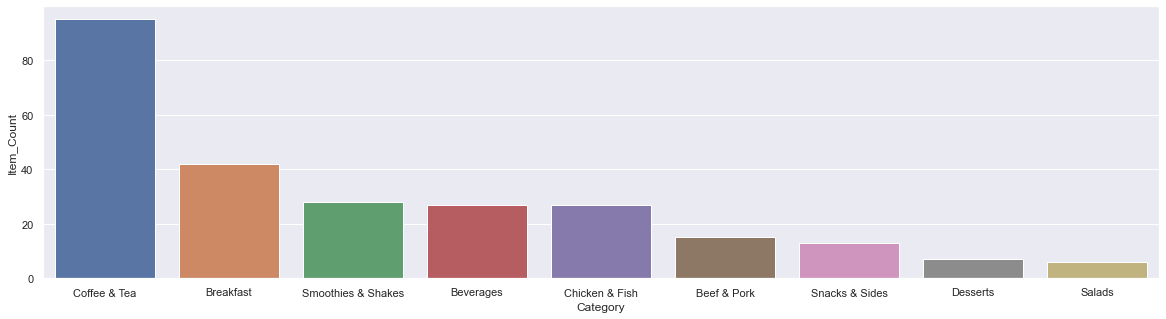

In [10]:
plt.figure(figsize= (20,5))
sns.barplot(x= 'Category', y='Item_Count', data=s );

From the Above Figure we Infer 'Coffee & Tea' Category has highest varieties & 'Salads' Category have lowest varieties

# Which all variables have an outlier?

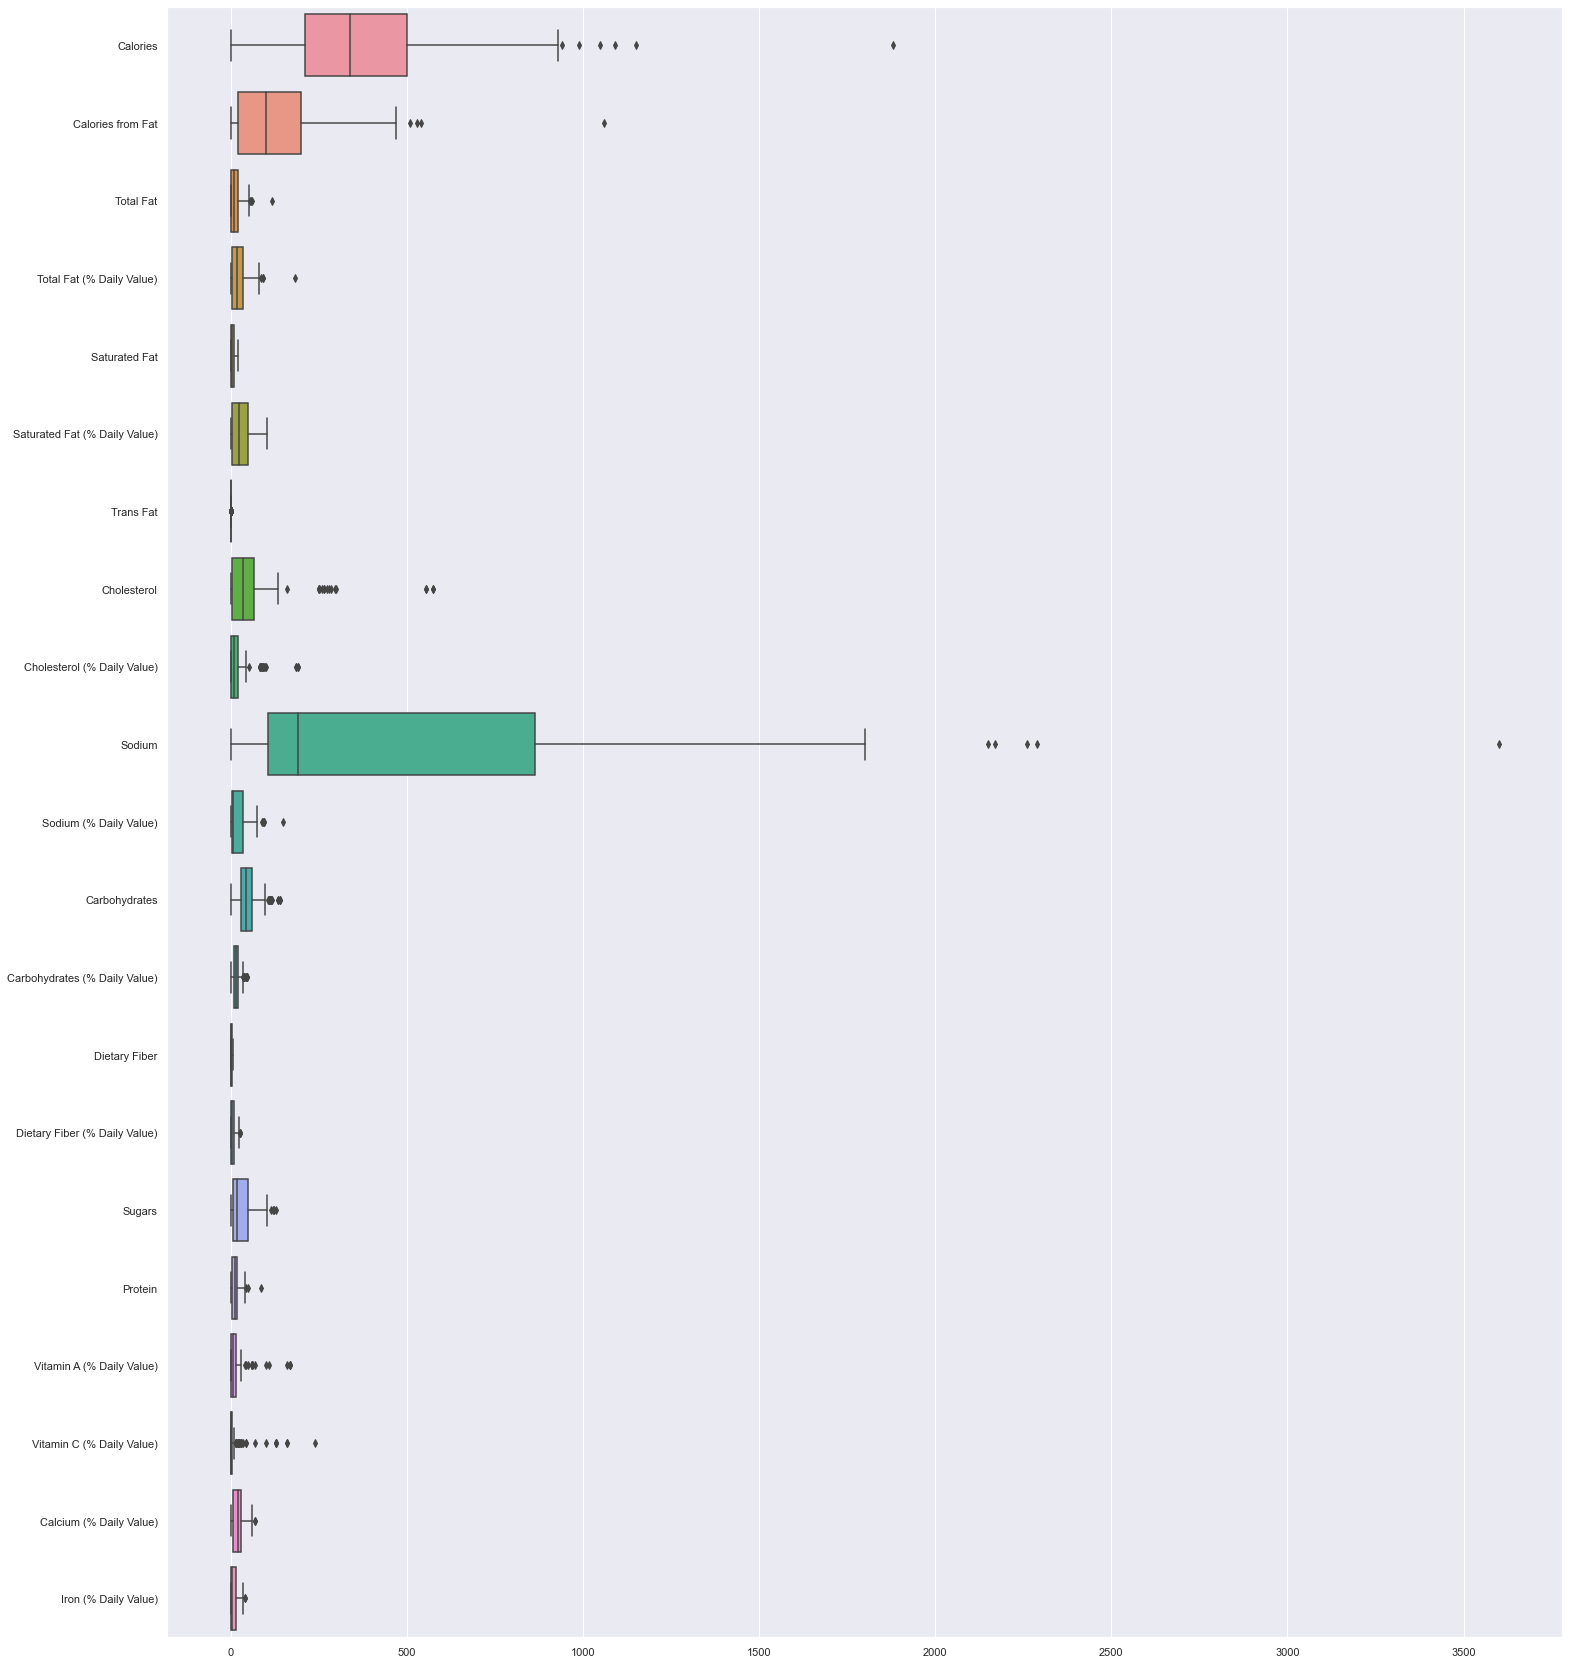

In [11]:
plt.figure(figsize= (25,30))
sns.boxplot(data=df, orient='h');

In [12]:
col_list = df.columns[3:]

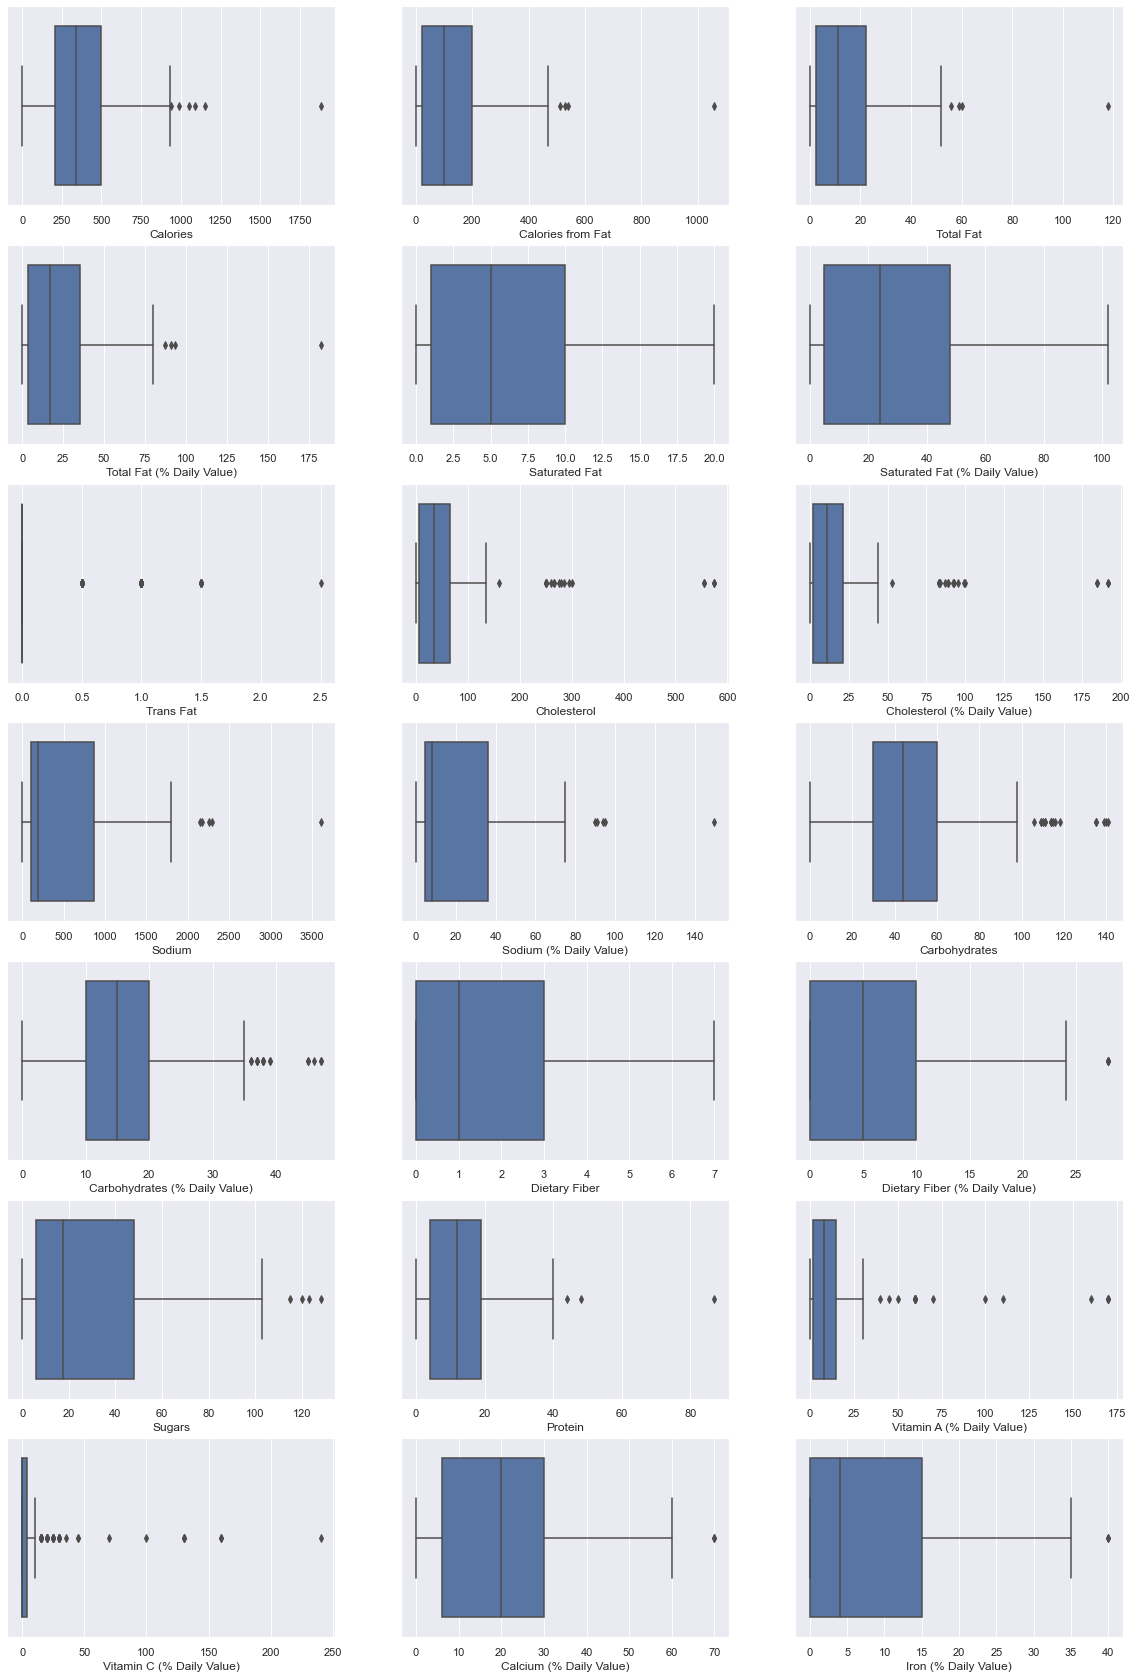

In [13]:
# List a is created such that its lengts is equal to length of colmns for which boxplots are created
a = []
for x in range(7):
    for y in range(3):
        a.append((x,y))
        
fig, axes = plt.subplots(7, 3,figsize=(20,30))


        
for x in range(len(col_list)):
    sns.boxplot(df[col_list[x]], ax = axes[a[x][0],a[x][1]]);

From above boxplot we infer following Variables have Outliers:

Calories, Calories from Fat, Total Fat, 
Total Fat (% Daily Value),
Trans Fat, Cholesterol (% Daily Value), Cholesterol, 
Sodium (% Daily Value), Sodium, Carbohydrates,
Carbohydrates (% Daily Value),  Dietary Fiber, Dietary Fiber (% Daily Value),
Sugars, Protein, Vitamin A (% Daily Value), 
Vitamin C (% Daily Value),Calcium (% Daily Value), Iron (% Daily Value)

# Which variables have the highest correlation? Plot them and find out the value?

In [14]:
c = df.corr()
c

Calories  Calories from Fat  Total Fat  \
Calories                       1.000000           0.904588   0.904409   
Calories from Fat              0.904588           1.000000   0.999663   
Total Fat                      0.904409           0.999663   1.000000   
Total Fat (% Daily Value)      0.904123           0.999725   0.999765   
Saturated Fat                  0.845564           0.847008   0.846707   
Saturated Fat (% Daily Value)  0.847631           0.849592   0.849293   
Trans Fat                      0.522441           0.433686   0.431453   
Cholesterol                    0.596399           0.682161   0.680547   
Cholesterol (% Daily Value)    0.595208           0.681607   0.680000   
Sodium                         0.712309           0.846624   0.846158   
Sodium (% Daily Value)         0.713415           0.847276   0.846780   
Carbohydrates                  0.781539           0.461672   0.461213   
Carbohydrates (% Daily Value)  0.781242           0.461463   0.461005   
Dietary Fiber                  0.538894           0.581274   0.580837   
Dietary Fiber (% Daily Value)  0.540014           0.575621   0.575206   
Sugars                         0.259598          -0.115285  -0.115446   
Protein                        0.787847           0.807913   0.807773   
Vitamin A (% Daily Value)      0.108844           0.056731   0.054434   
Vitamin C (% Daily Value)     -0.068747          -0.087331  -0.089354   
Calcium (% Daily Value)        0.428426           0.161034   0.162860   
Iron (% Daily Value)           0.643552           0.735894   0.734685   

                               Total Fat (% Daily Value)  Saturated Fat  \
Calories                                        0.904123       0.845564   
Calories from Fat                               0.999725       0.847008   
Total Fat                                       0.999765       0.846707   
Total Fat (% Daily Value)                       1.000000       0.847379   
Saturated Fat                                   0.847379       1.000000   
Saturated Fat (% Daily Value)                   0.849973       0.999279   
Trans Fat                                       0.433016       0.620611   
Cholesterol                                     0.680940       0.631210   
Cholesterol (% Daily Value)                     0.680378       0.630334   
Sodium                                          0.846728       0.584075   
Sodium (% Daily Value)                          0.847368       0.585323   
Carbohydrates                                   0.460516       0.591261   
Carbohydrates (% Daily Value)                   0.460298       0.591743   
Dietary Fiber                                   0.580592       0.351818   
Dietary Fiber (% Daily Value)                   0.575033       0.347152   
Sugars                                         -0.115761       0.197734   
Protein                                         0.807922       0.603028   
Vitamin A (% Daily Value)                       0.054038       0.064972   
Vitamin C (% Daily Value)                      -0.089353      -0.179672   
Calcium (% Daily Value)                         0.162031       0.403311   
Iron (% Daily Value)                            0.735478       0.578062   

                               Saturated Fat (% Daily Value)  Trans Fat  \
Calories                                            0.847631   0.522441   
Calories from Fat                                   0.849592   0.433686   
Total Fat                                           0.849293   0.431453   
Total Fat (% Daily Value)                           0.849973   0.433016   
Saturated Fat                                       0.999279   0.620611   
Saturated Fat (% Daily Value)                       1.000000   0.620210   
Trans Fat                                           0.620210   1.000000   
Cholesterol                                         0.633603   0.253935   
Cholesterol (% Daily Value)                         0.632712   0.251502   
Sodium                 

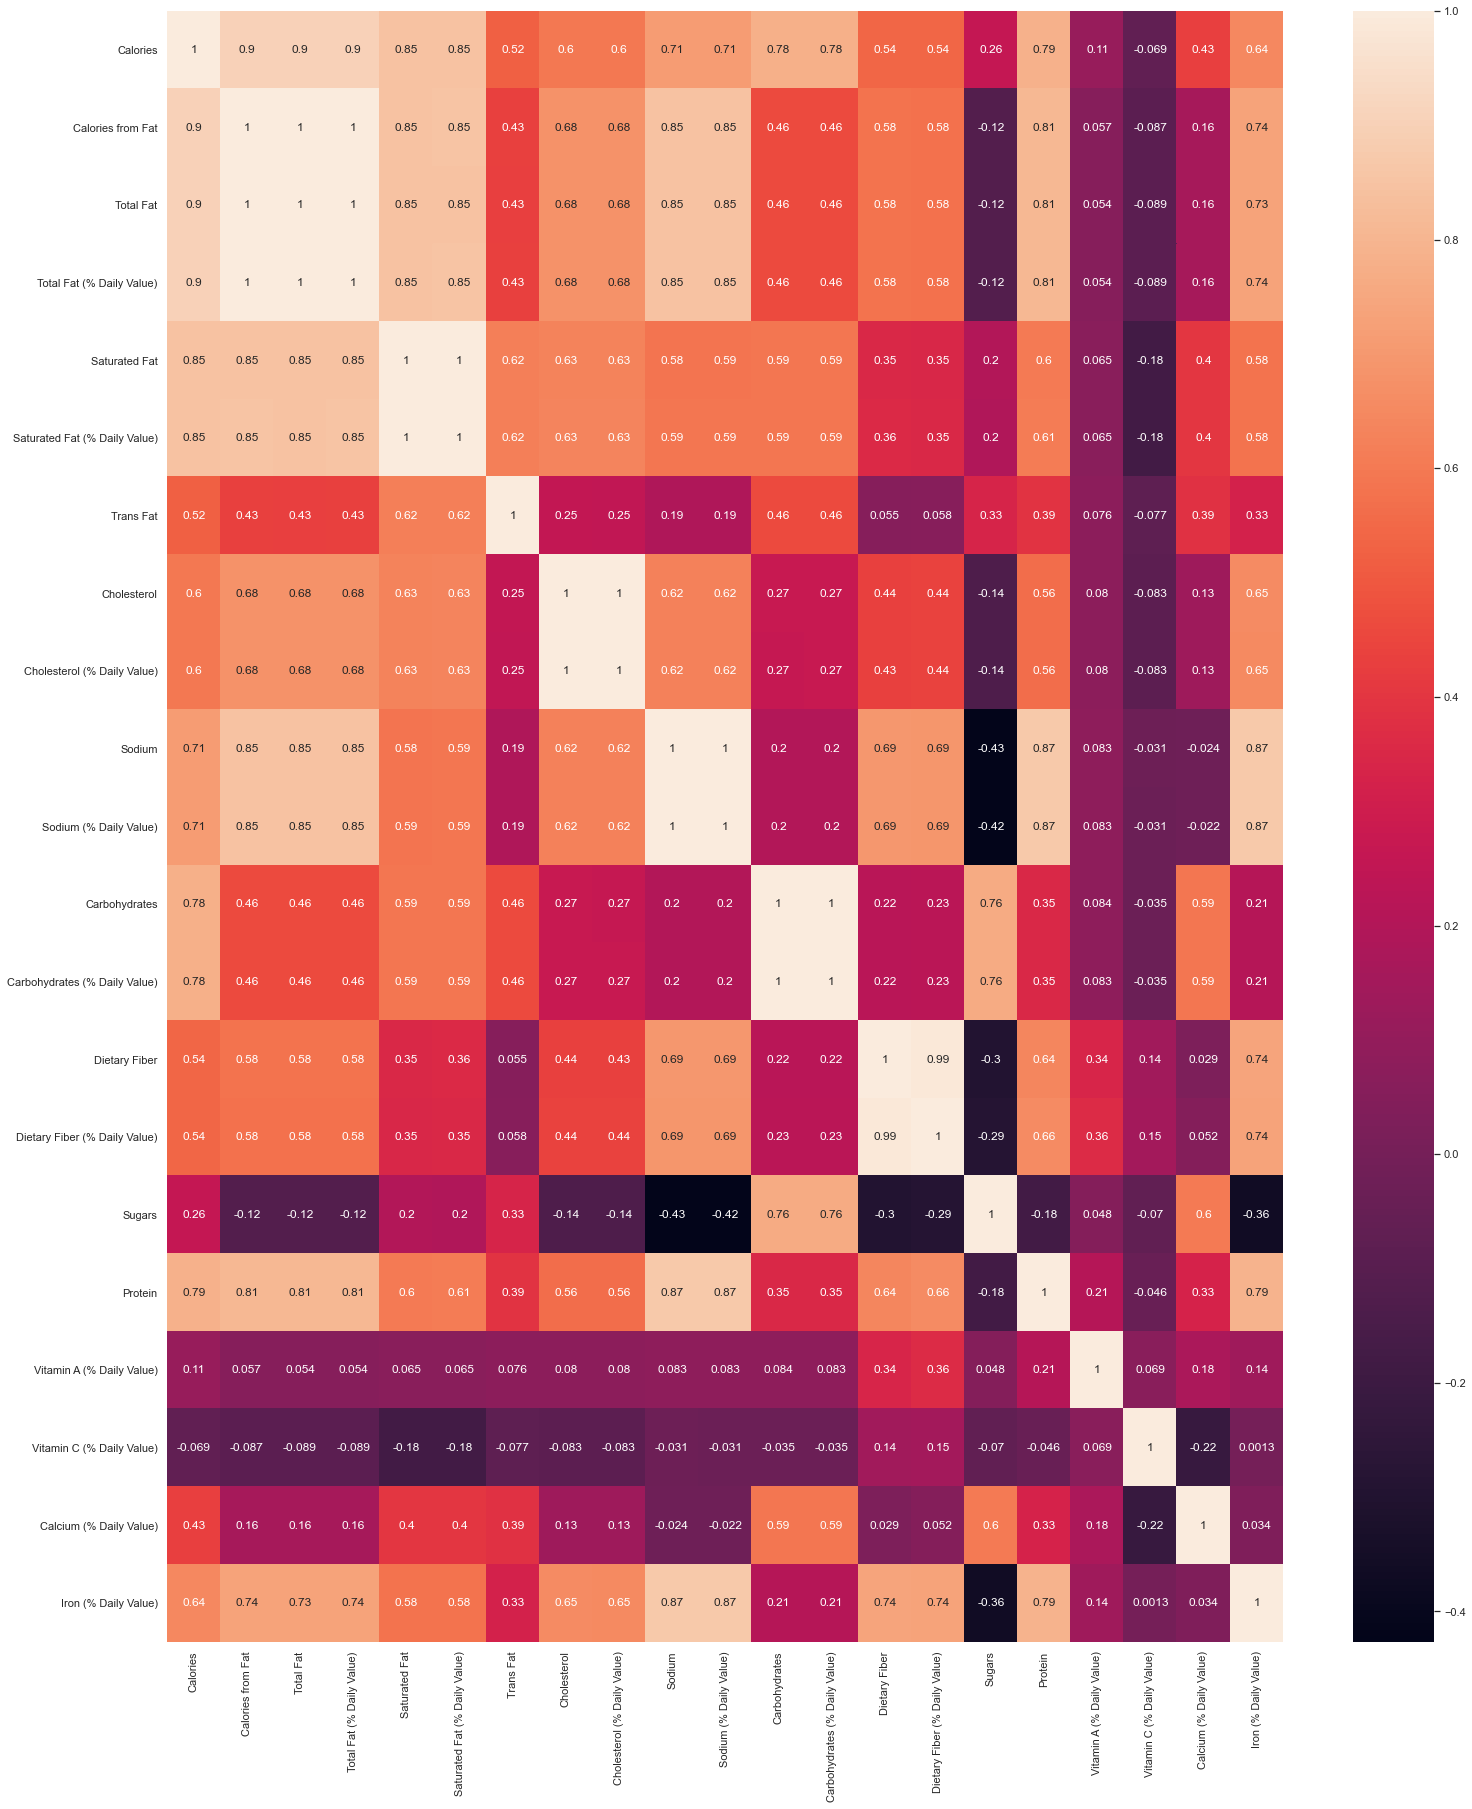

In [15]:
plt.figure(figsize= (25,30))
sns.heatmap(c, annot=True);

Following Variables have highest Correlation
1) Calories & Calories From fat with correlation value of 0.904588
2) Calories & Total Fat with correlation value of 0.904409

# Which category contributes to the maximum % of Cholesterol in a diet (% daily value)

In [16]:
v = df.groupby('Category')['Cholesterol (% Daily Value)'].sum().sort_values(ascending = False).to_frame().reset_index()
v.columns = ['Category','Cholesterol(%DailyValue)']
v['percent'] = (v['Cholesterol(%DailyValue)'] / 
                  v['Cholesterol(%DailyValue)'].sum()) * 100
v

Category  Cholesterol(%DailyValue)    percent
0           Breakfast                      2140  44.751150
1        Coffee & Tea                       891  18.632371
2      Chicken & Fish                       681  14.240903
3         Beef & Pork                       434   9.075701
4  Smoothies & Shakes                       412   8.615642
5              Salads                       104   2.174822
6      Snacks & Sides                        81   1.693852
7            Desserts                        34   0.711000
8           Beverages                         5   0.104559

Breakfast contributes to the maximum % of Cholesterol in a diet (% daily value)

# Which item contributes maximum to the Sodium intake?

In [17]:
df[['Item','Sodium']].sort_values('Sodium', ascending = False)

Item  Sodium
82                        Chicken McNuggets (40 piece)    3600
34   Big Breakfast with Hotcakes and Egg Whites (La...    2290
32         Big Breakfast with Hotcakes (Large Biscuit)    2260
33   Big Breakfast with Hotcakes and Egg Whites (Re...    2170
31       Big Breakfast with Hotcakes (Regular Biscuit)    2150
..                                                 ...     ...
134                  Minute Maid Orange Juice (Medium)       0
133                   Minute Maid Orange Juice (Small)       0
147                                     Coffee (Large)       0
113                          Coca-Cola Classic (Child)       0
110                          Coca-Cola Classic (Small)       0

[260 rows x 2 columns]

Chicken McNuggets (40 piece) has highest Sodium intake in given Dataset

# Which 4 food items contain the most amount of Saturated Fat?

In [18]:
df[['Item','Saturated Fat']].sort_values('Saturated Fat', ascending = False).head(4)

Item  Saturated Fat
231                Frappé Chocolate Chip (Large)           20.0
82                  Chicken McNuggets (40 piece)           20.0
32   Big Breakfast with Hotcakes (Large Biscuit)           20.0
253         McFlurry with M&M’s Candies (Medium)           20.0

Above listed 4 Items contains most amount of Saturated Fat